In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import json
import matplotlib
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

## Getting Song Chart

- We get the songs chart from https://spotifycharts.com/regional
- Contains 3 regions
    - US
    - UK
    - JP

### Example of csv file that we get from spotify 

In [2]:
example_chart = pd.read_csv('charts/regional-us-daily-latest.csv')
example_chart.head()

,Position,Track Name,Artist,Streams,URL
0,1,Shape of You,Ed Sheeran,1551040,https://open.spotify.com/track/7qiZfU4dY1lWllz...
1,2,Mask Off,Future,1360522,https://open.spotify.com/track/3rOSwuTsUlJp0Pu...
2,3,iSpy (feat. Lil Yachty),Kyle,1213427,https://open.spotify.com/track/2EEeOnHehOozLq4...
3,4,That's What I Like,Bruno Mars,1154088,https://open.spotify.com/track/0KKkJNfGyhkQ5aF...
4,5,Tunnel Vision,Kodak Black,1059848,https://open.spotify.com/track/2BoS7pU92MQtynh...


## Getting Audio Files

- **Spotify** provide **API**
    - https://api.spotify.com/v1/tracks/{track_id}

- Example
    - https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3

- However, there are a few tracks that **Spotify** does not provide `preview_url`
    - **Bossy** took care of that

- We downloaded 100 preview tracks for each region
    - Total 300 preview tracks

## Exploring Features

- Library that we use
    - [aubio](https://github.com/aubio/aubio)
    - [librosa](https://github.com/librosa/librosa)

- Finding features
    - **duration**
    - **Rhythm Feature**
        - **bpm** (beat per minute)
    - **Spectral Features**: Help indicate the tone of the song
        - **spectral centroid**: Measure of the brightness of a sound
        - **zero crossing rate**: Times the untransformed wave goes from positive to negative
        - **rolloff**: Measure of spectral shape

Spectral Features' content taken from: http://michael.hahsler.net/SMU/EMIS8331/S2012/tutorials/Music_Mining_slides.pdf

## Current Data

In [3]:
def read_from_json(file_name):
    with open(file_name, 'r') as f:
        return json.load(f)

In [4]:
data = read_from_json('data/data.json')

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,artist,bpm,centroid,duration_ms,position,region,rolloff,track_name,zero_crossing_rate
0,Ed Sheeran,97.469267,"[[1244.4210913718196, 1325.372003168119, 1291....",233712,1,JP,"[[2767.0166015625, 2896.2158203125, 2767.01660...",Shape of You,"[[0.02099609375, 0.03515625, 0.0458984375, 0.0..."
1,The Chainsmokers,104.140420,"[[3057.8363369199615, 3068.8002280368096, 2870...",247626,2,JP,"[[6987.5244140625, 7170.556640625, 6890.625, 6...",Something Just Like This,"[[0.0703125, 0.09619140625, 0.1123046875, 0.08..."
2,Zedd,103.399665,"[[2143.9807171529246, 2273.718883839052, 2581....",210090,3,JP,"[[5017.236328125, 5232.568359375, 5760.1318359...",Stay (with Alessia Cara),"[[0.03515625, 0.06689453125, 0.0986328125, 0.1..."
3,Kygo,101.354126,"[[1057.7017240469452, 1178.669214165471, 1339....",220780,4,JP,"[[1378.125, 2465.5517578125, 3046.9482421875, ...",It Ain't Me (with Selena Gomez),"[[0.0048828125, 0.0087890625, 0.01171875, 0.01..."
4,Ed Sheeran,135.692324,"[[1914.1415443185454, 2072.774526948462, 2557....",170826,5,JP,"[[3768.310546875, 3983.642578125, 5609.3994140...",Galway Girl,"[[0.04248046875, 0.076171875, 0.1064453125, 0...."


## Spectral Centroid

In [7]:
rand_idx = [np.random.randint(0, 300) for _ in range(2)]
sample_tracks = [data[idx] for idx in rand_idx]

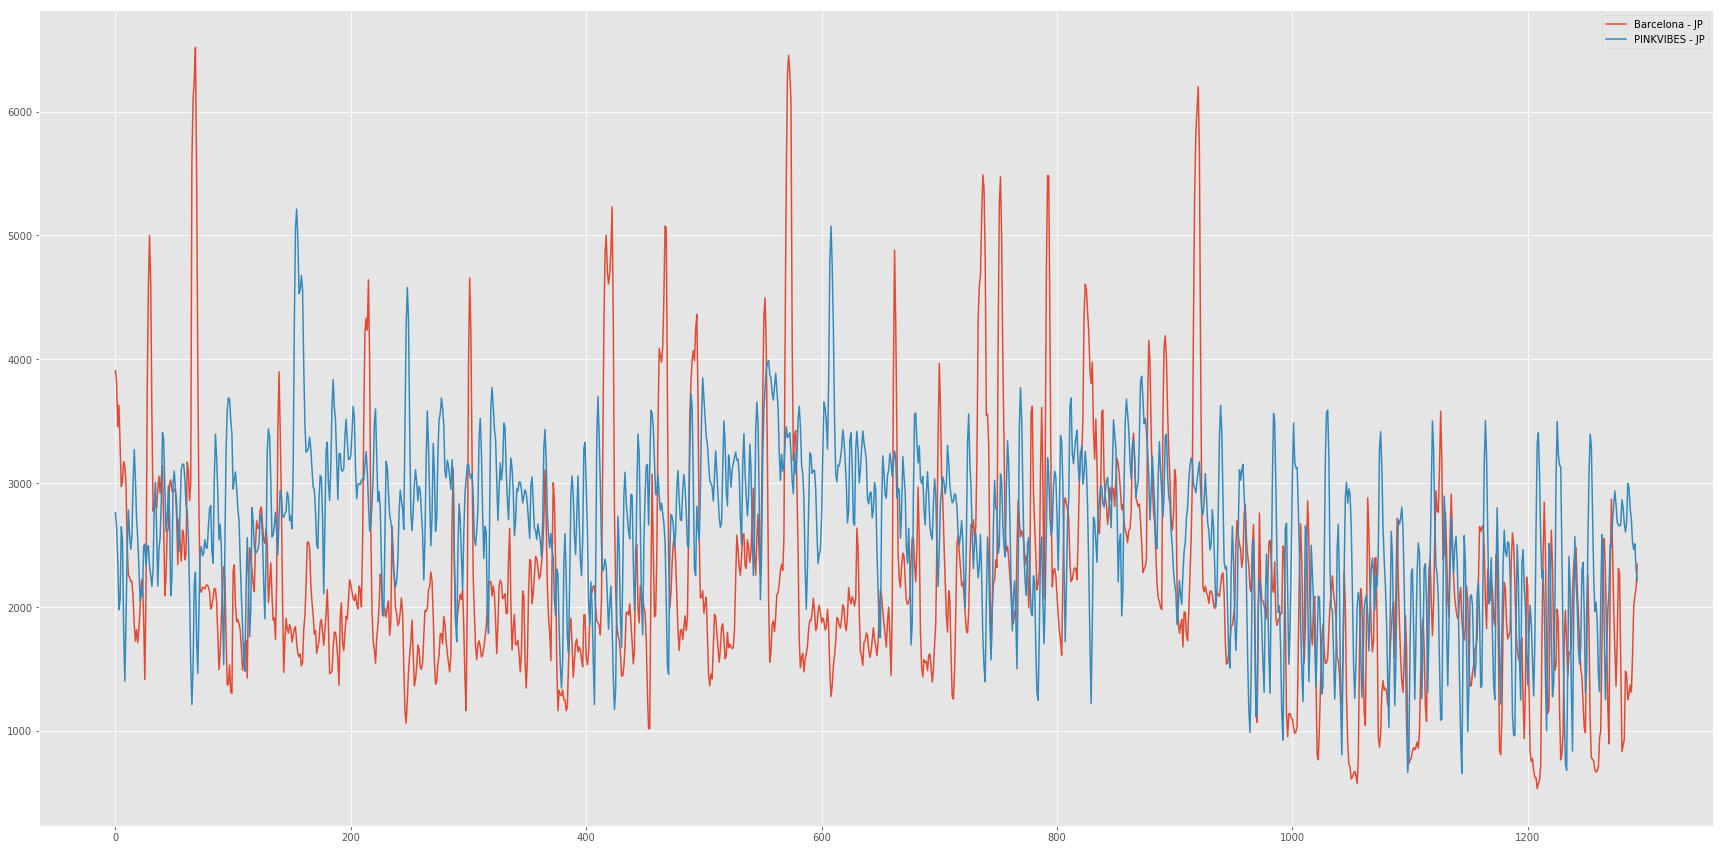

In [8]:
plt.figure(figsize=(30, 15))
for track in sample_tracks:
    plt.plot(track['centroid'][0], label=track['track_name'] + ' - ' + track['region'])
    plt.legend()

## Zero crossing rate

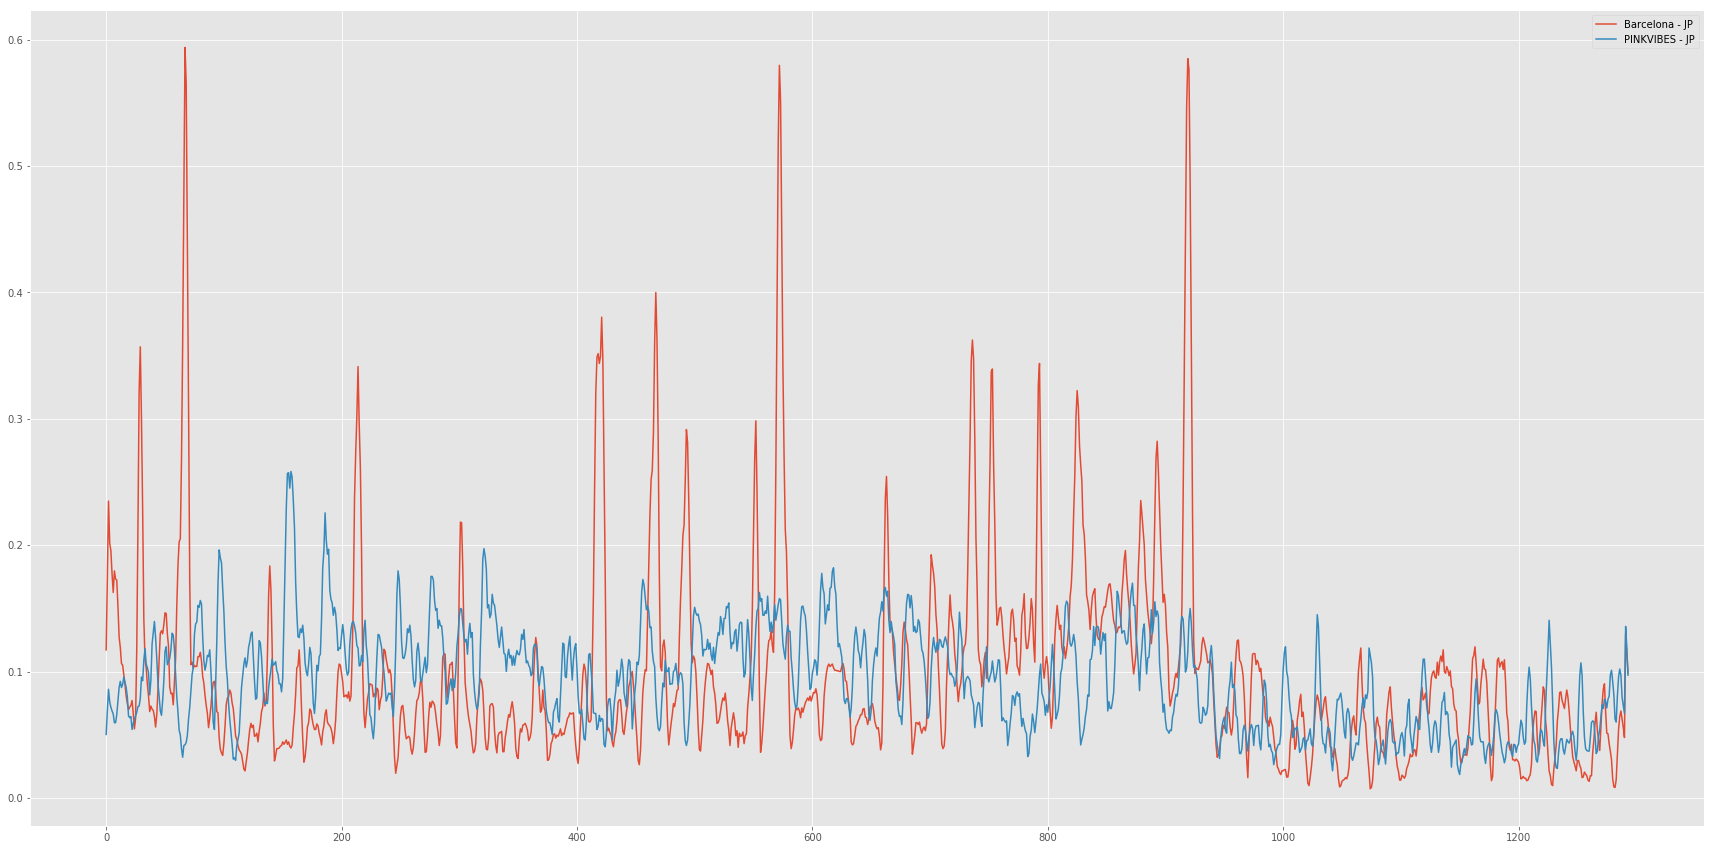

In [9]:
plt.figure(figsize=(30, 15))
for track in sample_tracks:
    plt.plot(track['zero_crossing_rate'][0], label=track['track_name'] + ' - ' + track['region'])
    plt.legend()

## Rolloff

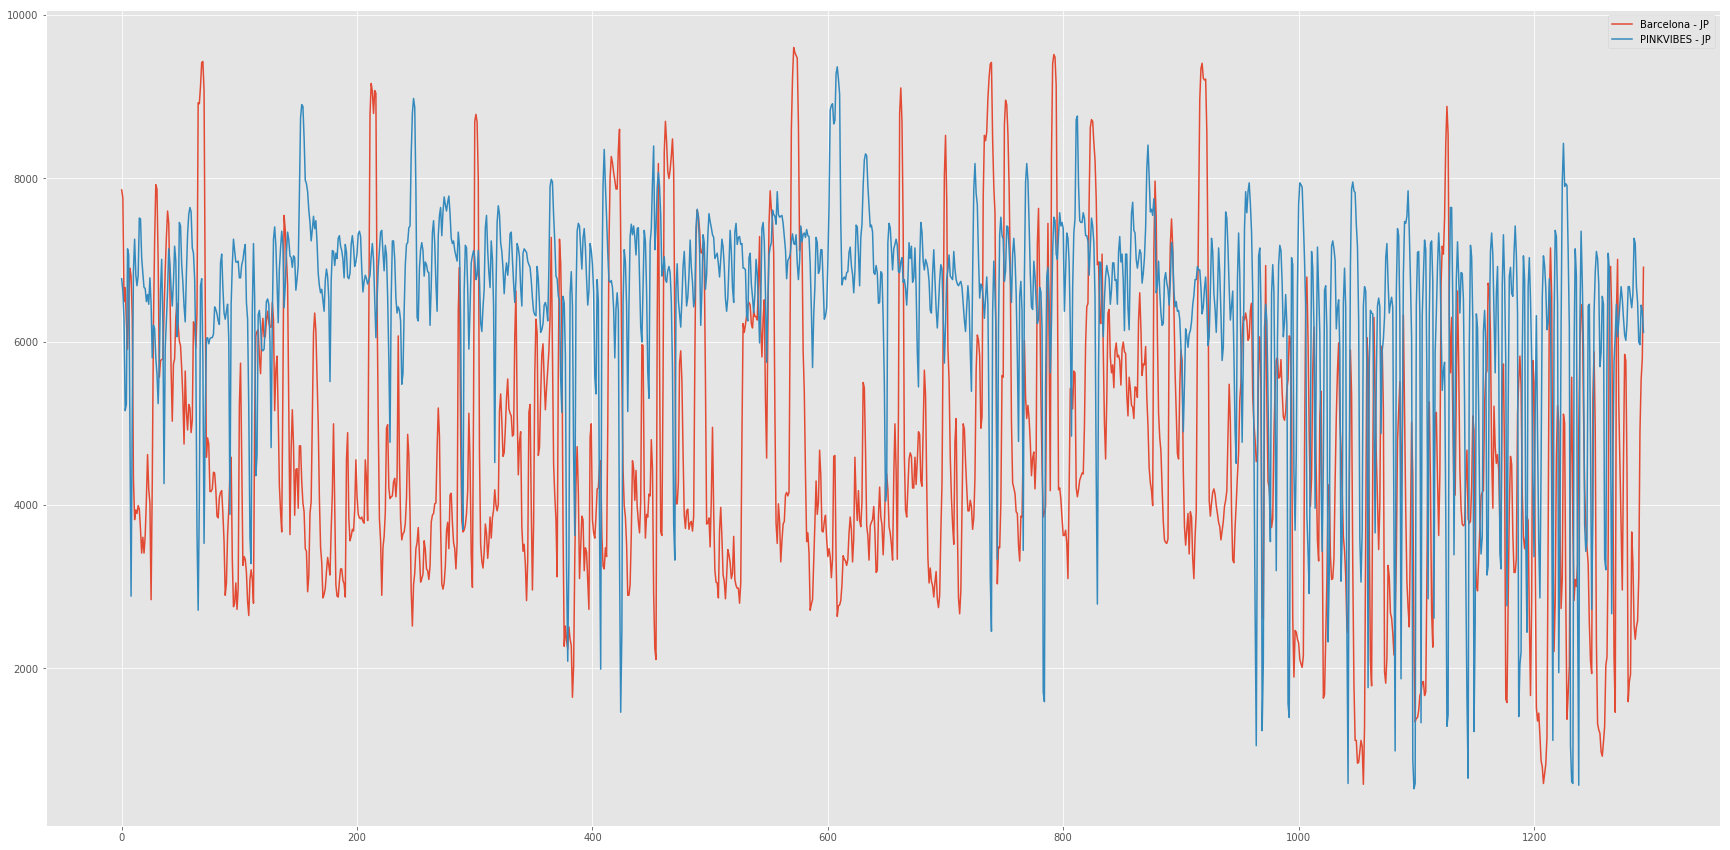

In [10]:
plt.figure(figsize=(30, 15))
for track in sample_tracks:
    plt.plot(track['rolloff'][0], label=track['track_name'] + ' - ' + track['region'])
    plt.legend()